In [1]:
import math 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler

In [2]:
import requests

In [3]:
key = "XTL1OOAD2EJD1V6Y"

base_url = "https://www.alphavantage.co/query"
function = "TIME_SERIES_DAILY"
symbol = "TSLA"
outputsize = "compact"  
interval = "daily"  

In [4]:
params = {
    "function": function,
    "symbol": symbol,
    "outputsize": outputsize,
    "apikey": key,
    #"interval": interval,  
}

In [5]:
response = requests.get(base_url, params=params)

In [6]:
data = response.json()

In [7]:
data

{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes',
  '2. Symbol': 'TSLA',
  '3. Last Refreshed': '2023-09-12',
  '4. Output Size': 'Compact',
  '5. Time Zone': 'US/Eastern'},
 'Time Series (Daily)': {'2023-09-12': {'1. open': '270.7600',
   '2. high': '278.3900',
   '3. low': '266.6000',
   '4. close': '267.4800',
   '5. volume': '135999866'},
  '2023-09-11': {'1. open': '264.2700',
   '2. high': '274.8500',
   '3. low': '260.6100',
   '4. close': '273.5800',
   '5. volume': '174667852'},
  '2023-09-08': {'1. open': '251.2200',
   '2. high': '256.5200',
   '3. low': '246.6700',
   '4. close': '248.5000',
   '5. volume': '118559635'},
  '2023-09-07': {'1. open': '245.0700',
   '2. high': '252.8100',
   '3. low': '243.2650',
   '4. close': '251.4900',
   '5. volume': '115312886'},
  '2023-09-06': {'1. open': '255.1350',
   '2. high': '255.3900',
   '3. low': '245.0600',
   '4. close': '251.9200',
   '5. volume': '116959759'},
  '2023-09-05': {'1. open':

In [8]:
ts_data = data["Time Series (Daily)"]

In [9]:
df = pd.DataFrame.from_dict(ts_data, orient="index")  #json to dataframe

In [10]:
df.head()

,1. open,2. high,3. low,4. close,5. volume
2023-09-12,270.7600,278.3900,266.6000,267.4800,135999866
2023-09-11,264.2700,274.8500,260.6100,273.5800,174667852
2023-09-08,251.2200,256.5200,246.6700,248.5000,118559635
2023-09-07,245.0700,252.8100,243.2650,251.4900,115312886
2023-09-06,255.1350,255.3900,245.0600,251.9200,116959759


In [11]:
columns = ['open', 'high', 'low', 'close', 'volume']  

In [12]:
df.columns = columns  #renaming column names

In [13]:
df.head()

,open,high,low,close,volume
2023-09-12,270.7600,278.3900,266.6000,267.4800,135999866
2023-09-11,264.2700,274.8500,260.6100,273.5800,174667852
2023-09-08,251.2200,256.5200,246.6700,248.5000,118559635
2023-09-07,245.0700,252.8100,243.2650,251.4900,115312886
2023-09-06,255.1350,255.3900,245.0600,251.9200,116959759


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 2023-09-12 to 2023-04-20
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   open    100 non-null    object
 1   high    100 non-null    object
 2   low     100 non-null    object
 3   close   100 non-null    object
 4   volume  100 non-null    object
dtypes: object(5)
memory usage: 4.7+ KB


In [15]:
df = df.apply(pd.to_numeric, errors='coerce')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 2023-09-12 to 2023-04-20
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    100 non-null    float64
 1   high    100 non-null    float64
 2   low     100 non-null    float64
 3   close   100 non-null    float64
 4   volume  100 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 4.7+ KB


In [17]:
import seaborn as sns

In [18]:
sns.set_theme(style="dark")

In [19]:
df['Date'] = pd.to_datetime(df.index)  #creating new column of datetime datatype

In [20]:
df1 = df.sort_values('Date')

In [21]:
df1

,open,high,low,close,volume,Date
2023-04-20,166.165,169.70,160.5600,162.99,210970819,2023-04-20
2023-04-21,164.800,166.00,161.3208,165.08,123538954,2023-04-21
2023-04-24,164.650,165.65,158.6100,162.55,140006559,2023-04-24
2023-04-25,159.820,163.47,158.7500,160.67,121999312,2023-04-25
2023-04-26,160.290,160.67,153.1400,153.75,152247096,2023-04-26
...,...,...,...,...,...,...
2023-09-06,255.135,255.39,245.0600,251.92,116959759,2023-09-06
2023-09-07,245.070,252.81,243.2650,251.49,115312886,2023-09-07
2023-09-08,251.220,256.52,246.6700,248.50,118559635,2023-09-08
2023-09-11,264.270,274.85,260.6100,273.58,174667852,2023-09-11


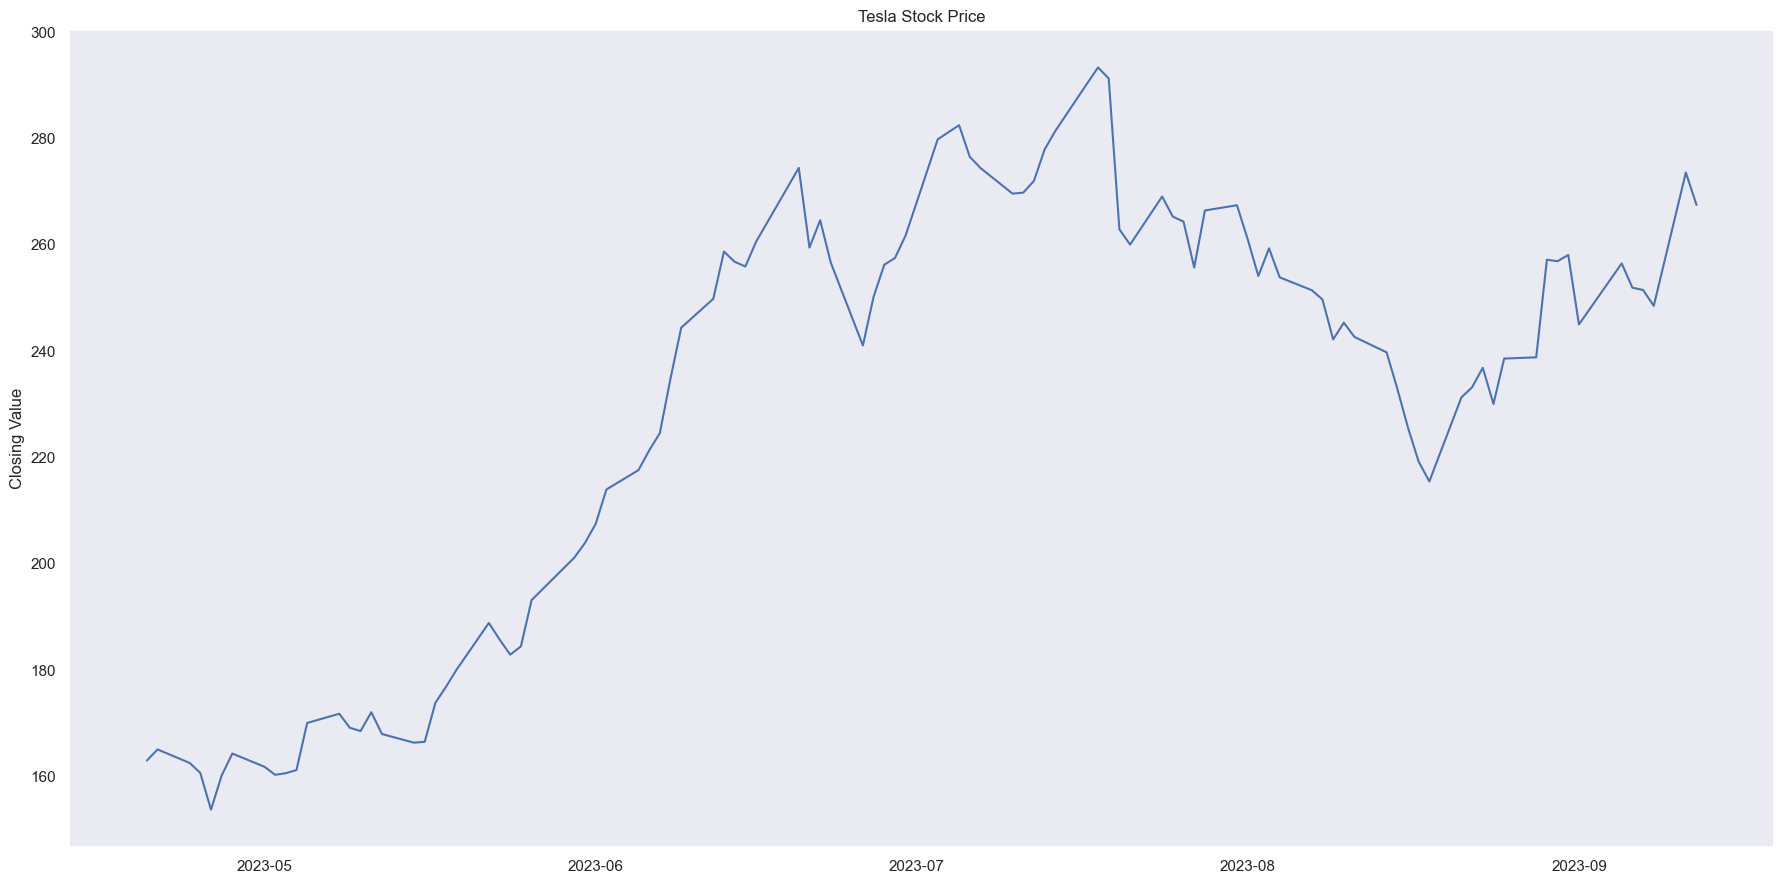

In [22]:
#lineplotting closing value of last 100 days

plt.figure(figsize=(18,9))
sns.lineplot(data=df1, x='Date', y='close')
plt.xlabel('')
plt.ylabel('Closing Value')
plt.title("Tesla Stock Price")
plt.tight_layout()
plt.show()

In [23]:
import mplfinance as mpf

In [24]:
df1.head()

,open,high,low,close,volume,Date
2023-04-20,166.165,169.70,160.5600,162.99,210970819,2023-04-20
2023-04-21,164.800,166.00,161.3208,165.08,123538954,2023-04-21
2023-04-24,164.650,165.65,158.6100,162.55,140006559,2023-04-24
2023-04-25,159.820,163.47,158.7500,160.67,121999312,2023-04-25
2023-04-26,160.290,160.67,153.1400,153.75,152247096,2023-04-26


In [25]:
df1['Date']=pd.to_datetime(df1['Date'])

In [26]:
df1.index=df1['Date']

In [27]:
df1.drop(columns='Date')

,open,high,low,close,volume
Date,,,,,
2023-04-20,166.165,169.70,160.5600,162.99,210970819
2023-04-21,164.800,166.00,161.3208,165.08,123538954
2023-04-24,164.650,165.65,158.6100,162.55,140006559
2023-04-25,159.820,163.47,158.7500,160.67,121999312
2023-04-26,160.290,160.67,153.1400,153.75,152247096
...,...,...,...,...,...
2023-09-06,255.135,255.39,245.0600,251.92,116959759
2023-09-07,245.070,252.81,243.2650,251.49,115312886
2023-09-08,251.220,256.52,246.6700,248.50,118559635


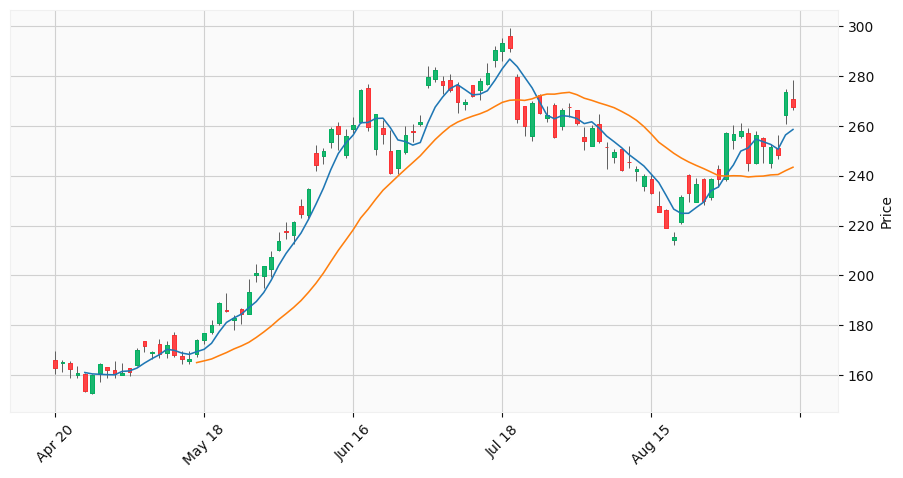

In [28]:
mpf.plot(df1, type='candle', style='yahoo', mav=(5,20), figratio=(18,9))  #candlestick plotting using mpl finance lib
plt.show()

In [29]:
df1

,open,high,low,close,volume,Date
Date,,,,,,
2023-04-20,166.165,169.70,160.5600,162.99,210970819,2023-04-20
2023-04-21,164.800,166.00,161.3208,165.08,123538954,2023-04-21
2023-04-24,164.650,165.65,158.6100,162.55,140006559,2023-04-24
2023-04-25,159.820,163.47,158.7500,160.67,121999312,2023-04-25
2023-04-26,160.290,160.67,153.1400,153.75,152247096,2023-04-26
...,...,...,...,...,...,...
2023-09-06,255.135,255.39,245.0600,251.92,116959759,2023-09-06
2023-09-07,245.070,252.81,243.2650,251.49,115312886,2023-09-07
2023-09-08,251.220,256.52,246.6700,248.50,118559635,2023-09-08


In [30]:
df1.drop(columns='Date', inplace=True)

In [31]:
df1

,open,high,low,close,volume
Date,,,,,
2023-04-20,166.165,169.70,160.5600,162.99,210970819
2023-04-21,164.800,166.00,161.3208,165.08,123538954
2023-04-24,164.650,165.65,158.6100,162.55,140006559
2023-04-25,159.820,163.47,158.7500,160.67,121999312
2023-04-26,160.290,160.67,153.1400,153.75,152247096
...,...,...,...,...,...
2023-09-06,255.135,255.39,245.0600,251.92,116959759
2023-09-07,245.070,252.81,243.2650,251.49,115312886
2023-09-08,251.220,256.52,246.6700,248.50,118559635


In [32]:
total_rows = len(df1)

In [33]:
total_rows

100

In [34]:
train_size = int(0.7*total_rows)

In [35]:
test_size = int(0.3*total_rows)

In [36]:
train_data = df1[:train_size]

In [37]:
test_data = df1[train_size:(train_size+test_size)]

In [38]:
test_data

,open,high,low,close,volume
Date,,,,,
2023-08-01,266.2600,266.4700,260.2500,261.07,83645720
2023-08-02,255.5700,259.5200,250.4900,254.11,101752865
2023-08-03,252.0400,260.4900,252.0000,259.32,97829545
2023-08-04,260.9700,264.7700,253.1100,253.86,99539907
2023-08-07,251.4500,253.6511,242.7600,251.45,111097943
2023-08-08,247.4500,250.9200,245.0100,249.70,96642183
2023-08-09,250.8700,251.1000,241.9000,242.19,101596324
2023-08-10,245.4000,251.8000,243.0000,245.34,109498608
2023-08-11,241.7700,243.7900,238.0200,242.65,99038642


In [39]:
len(train_data)

70

In [40]:
len(test_data)

30

In [41]:
train_data

,open,high,low,close,volume
Date,,,,,
2023-04-20,166.165,169.70,160.5600,162.99,210970819
2023-04-21,164.800,166.00,161.3208,165.08,123538954
2023-04-24,164.650,165.65,158.6100,162.55,140006559
2023-04-25,159.820,163.47,158.7500,160.67,121999312
2023-04-26,160.290,160.67,153.1400,153.75,152247096
...,...,...,...,...,...
2023-07-25,272.380,272.90,265.0000,265.28,112757327
2023-07-26,263.250,268.04,261.7500,264.35,95856177
2023-07-27,268.310,269.13,255.3000,255.71,103697263


In [42]:
test_data

,open,high,low,close,volume
Date,,,,,
2023-08-01,266.2600,266.4700,260.2500,261.07,83645720
2023-08-02,255.5700,259.5200,250.4900,254.11,101752865
2023-08-03,252.0400,260.4900,252.0000,259.32,97829545
2023-08-04,260.9700,264.7700,253.1100,253.86,99539907
2023-08-07,251.4500,253.6511,242.7600,251.45,111097943
2023-08-08,247.4500,250.9200,245.0100,249.70,96642183
2023-08-09,250.8700,251.1000,241.9000,242.19,101596324
2023-08-10,245.4000,251.8000,243.0000,245.34,109498608
2023-08-11,241.7700,243.7900,238.0200,242.65,99038642


In [43]:
#from tensorflow.keras.callbacks import EarlyStopping

In [44]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 70 entries, 2023-04-20 to 2023-07-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    70 non-null     float64
 1   high    70 non-null     float64
 2   low     70 non-null     float64
 3   close   70 non-null     float64
 4   volume  70 non-null     int64  
dtypes: float64(4), int64(1)
memory usage: 3.3 KB


In [45]:
close_price = train_data['close'].values

In [46]:
close_price

array([162.99, 165.08, 162.55, 160.67, 153.75, 160.19, 164.31, 161.83,
       160.31, 160.61, 161.2 , 170.06, 171.79, 169.15, 168.54, 172.08,
       167.98, 166.35, 166.52, 173.86, 176.89, 180.14, 188.87, 185.77,
       182.9 , 184.47, 193.17, 201.16, 203.93, 207.52, 213.97, 217.61,
       221.31, 224.57, 234.86, 244.4 , 249.83, 258.71, 256.79, 255.9 ,
       260.54, 274.45, 259.46, 264.61, 256.6 , 241.05, 250.21, 256.24,
       257.5 , 261.77, 279.82, 282.48, 276.54, 274.43, 269.61, 269.79,
       271.99, 277.9 , 281.38, 290.38, 293.34, 291.26, 262.9 , 260.02,
       269.06, 265.28, 264.35, 255.71, 266.44, 267.43])

In [47]:
window = 20

ma = df1['close'].ewm(span=window, adjust=True).mean()

In [48]:
ma

Date
2023-04-20    162.990000
2023-04-21    164.087250
2023-04-24    163.522781
2023-04-25    162.699227
2023-04-26    160.534485
                 ...    
2023-09-06    246.402996
2023-09-07    246.887502
2023-09-08    247.041082
2023-09-11    249.568724
2023-09-12    251.274636
Name: close, Length: 100, dtype: float64

In [49]:
ma.dropna(inplace=True)

In [50]:
ma.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 100 entries, 2023-04-20 to 2023-09-12
Series name: close
Non-Null Count  Dtype  
--------------  -----  
100 non-null    float64
dtypes: float64(1)
memory usage: 1.6 KB


In [51]:
column = ['price']

In [52]:
ma

Date
2023-04-20    162.990000
2023-04-21    164.087250
2023-04-24    163.522781
2023-04-25    162.699227
2023-04-26    160.534485
                 ...    
2023-09-06    246.402996
2023-09-07    246.887502
2023-09-08    247.041082
2023-09-11    249.568724
2023-09-12    251.274636
Name: close, Length: 100, dtype: float64

In [53]:
ind = ma.index

In [54]:
ind

DatetimeIndex(['2023-04-20', '2023-04-21', '2023-04-24', '2023-04-25',
               '2023-04-26', '2023-04-27', '2023-04-28', '2023-05-01',
               '2023-05-02', '2023-05-03', '2023-05-04', '2023-05-05',
               '2023-05-08', '2023-05-09', '2023-05-10', '2023-05-11',
               '2023-05-12', '2023-05-15', '2023-05-16', '2023-05-17',
               '2023-05-18', '2023-05-19', '2023-05-22', '2023-05-23',
               '2023-05-24', '2023-05-25', '2023-05-26', '2023-05-30',
               '2023-05-31', '2023-06-01', '2023-06-02', '2023-06-05',
               '2023-06-06', '2023-06-07', '2023-06-08', '2023-06-09',
               '2023-06-12', '2023-06-13', '2023-06-14', '2023-06-15',
               '2023-06-16', '2023-06-20', '2023-06-21', '2023-06-22',
               '2023-06-23', '2023-06-26', '2023-06-27', '2023-06-28',
               '2023-06-29', '2023-06-30', '2023-07-03', '2023-07-05',
               '2023-07-06', '2023-07-07', '2023-07-10', '2023-07-11',
      

In [55]:
fil_d = df1[df1.index.isin(ind)]

In [56]:
fil_d

,open,high,low,close,volume
Date,,,,,
2023-04-20,166.165,169.70,160.5600,162.99,210970819
2023-04-21,164.800,166.00,161.3208,165.08,123538954
2023-04-24,164.650,165.65,158.6100,162.55,140006559
2023-04-25,159.820,163.47,158.7500,160.67,121999312
2023-04-26,160.290,160.67,153.1400,153.75,152247096
...,...,...,...,...,...
2023-09-06,255.135,255.39,245.0600,251.92,116959759
2023-09-07,245.070,252.81,243.2650,251.49,115312886
2023-09-08,251.220,256.52,246.6700,248.50,118559635


In [57]:
avg = ma.values

In [58]:
avg

array([162.99      , 164.08725   , 163.52278102, 162.69922724,
       160.53448533, 160.46181466, 161.18941126, 161.30014024,
       161.14131691, 161.06130518, 161.08109594, 162.30427547,
       163.54561561, 164.25379827, 164.77906394, 165.64999436,
       165.92141309, 165.97029965, 166.03184234, 166.89384613,
       167.97844422, 169.2807191 , 171.35381223, 172.86346067,
       173.90460583, 174.99137729, 176.8471094 , 179.31217362,
       181.79289587, 184.37113841, 187.32269952, 190.32943876,
       193.39263817, 196.46412585, 200.23439598, 204.55843847,
       208.97896992, 213.82328645, 217.9996166 , 221.67629318,
       225.43975618, 230.1782056 , 233.00516833, 236.0524274 ,
       238.03123929, 238.32164826, 239.46422359, 241.07512086,
       242.6510827 , 244.4842322 , 247.87009851, 251.18448445,
       253.61135594, 255.6030391 , 256.94248431, 258.17057738,
       259.49111036, 261.24963627, 263.17205425, 265.76969392,
       268.40130975, 270.58273207, 269.8497043 , 268.91

In [59]:
mav = pd.DataFrame(avg, columns=['price'], index=ma.index)

In [60]:
mav

,price
Date,
2023-04-20,162.990000
2023-04-21,164.087250
2023-04-24,163.522781
2023-04-25,162.699227
2023-04-26,160.534485
...,...
2023-09-06,246.402996
2023-09-07,246.887502
2023-09-08,247.041082


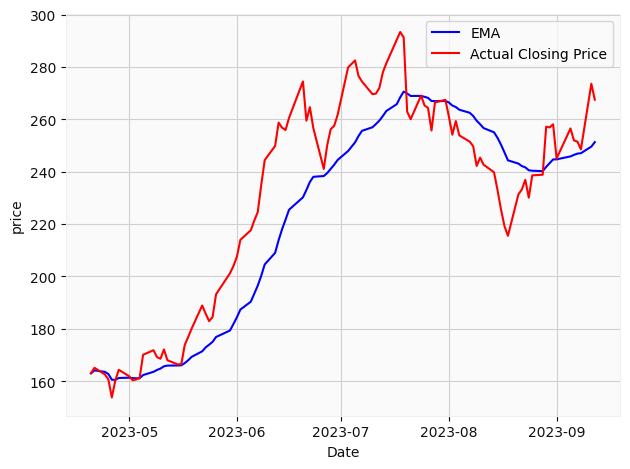

In [61]:
sns.lineplot(data=mav, x='Date', y='price', color='blue', label='EMA')
sns.lineplot(data=fil_d, x='Date', y='close', color='red', label='Actual Closing Price')
plt.legend()
plt.tight_layout()
plt.show()

In [62]:
#normalising data 

scaler = MinMaxScaler()
scaled_train_data = scaler.fit_transform(train_data)
scaled_test_data = scaler.transform(test_data)

In [63]:
scaled_train_data

array([[0.0943166 , 0.06642173, 0.0597156 , 0.06619385, 0.99350477],
       [0.08479777, 0.03976659, 0.0652628 , 0.08116627, 0.30622805],
       [0.08375174, 0.03724516, 0.0454976 , 0.06304177, 0.43567515],
       [0.05006974, 0.02154023, 0.04651838, 0.04957375, 0.29412537],
       [0.05334728, 0.00136878, 0.00561429, 0.        , 0.53189449],
       [0.        , 0.        , 0.        , 0.04613511, 0.33355364],
       [0.05760112, 0.0325625 , 0.03609184, 0.07565012, 0.29818542],
       [0.07343096, 0.02017146, 0.04710168, 0.0578838 , 0.19205981],
       [0.06443515, 0.0360925 , 0.04783081, 0.04699477, 0.34333682],
       [0.0513947 , 0.0325625 , 0.05497626, 0.04914392, 0.27627102],
       [0.07022315, 0.01779411, 0.05308053, 0.05337059, 0.08274437],
       [0.07900976, 0.07427347, 0.08122488, 0.11684218, 0.18099358],
       [0.14700139, 0.0959585 , 0.12263936, 0.12923562, 0.2174845 ],
       [0.1137378 , 0.06728622, 0.10346329, 0.11032309, 0.03445249],
       [0.1388424 , 0.10049708, 0.

In [64]:
scaled_test_data

array([[ 0.79232915,  0.7635617 ,  0.78658346,  0.76882298, -0.00736118],
       [ 0.71778243,  0.71349326,  0.71542055,  0.71896268,  0.13497387],
       [ 0.69316597,  0.72048123,  0.72643039,  0.75628627,  0.10413379],
       [ 0.75543933,  0.75131475,  0.73452371,  0.71717172,  0.11757845],
       [ 0.6890516 ,  0.67121317,  0.65905894,  0.69990687,  0.20843284],
       [ 0.6611576 ,  0.65153807,  0.67546433,  0.68737016,  0.09480027],
       [ 0.68500697,  0.65283481,  0.65278844,  0.63356974,  0.13374335],
       [ 0.64686192,  0.65787767,  0.66080885,  0.65613583,  0.19586093],
       [ 0.62154812,  0.6001729 ,  0.62449827,  0.6368651 ,  0.11363815],
       [ 0.57921897,  0.57762409,  0.5933645 ,  0.61616162,  0.11015341],
       [ 0.60034868,  0.57647144,  0.58505244,  0.56744752,  0.02841983],
       [ 0.52566248,  0.52942872,  0.53233647,  0.51472168,  0.21933233],
       [ 0.51199442,  0.47734313,  0.48457857,  0.46901641,  0.28405662],
       [ 0.42873082,  0.41135365,  0.4

In [65]:
x_train = []
y_train = []

In [66]:
sequence_length = 10

In [67]:
for i in range(len(scaled_train_data)-sequence_length):
    x_train.append(scaled_train_data[i:i+sequence_length])
    y_train.append(scaled_train_data[i+sequence_length])

In [68]:
x_test = []
y_test = []

In [69]:
for i in range(len(scaled_test_data)-sequence_length):
    x_test.append(scaled_test_data[i:i+sequence_length])
    y_test.append(scaled_test_data[i+sequence_length])

In [70]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_test, y_test = np.array(x_test), np.array(y_test)

In [71]:
x_train

array([[[0.0943166 , 0.06642173, 0.0597156 , 0.06619385, 0.99350477],
        [0.08479777, 0.03976659, 0.0652628 , 0.08116627, 0.30622805],
        [0.08375174, 0.03724516, 0.0454976 , 0.06304177, 0.43567515],
        ...,
        [0.07343096, 0.02017146, 0.04710168, 0.0578838 , 0.19205981],
        [0.06443515, 0.0360925 , 0.04783081, 0.04699477, 0.34333682],
        [0.0513947 , 0.0325625 , 0.05497626, 0.04914392, 0.27627102]],

       [[0.08479777, 0.03976659, 0.0652628 , 0.08116627, 0.30622805],
        [0.08375174, 0.03724516, 0.0454976 , 0.06304177, 0.43567515],
        [0.05006974, 0.02154023, 0.04651838, 0.04957375, 0.29412537],
        ...,
        [0.06443515, 0.0360925 , 0.04783081, 0.04699477, 0.34333682],
        [0.0513947 , 0.0325625 , 0.05497626, 0.04914392, 0.27627102],
        [0.07022315, 0.01779411, 0.05308053, 0.05337059, 0.08274437]],

       [[0.08375174, 0.03724516, 0.0454976 , 0.06304177, 0.43567515],
        [0.05006974, 0.02154023, 0.04651838, 0.04957375, 0.2

In [72]:
y_train

array([[0.07022315, 0.01779411, 0.05308053, 0.05337059, 0.08274437],
       [0.07900976, 0.07427347, 0.08122488, 0.11684218, 0.18099358],
       [0.14700139, 0.0959585 , 0.12263936, 0.12923562, 0.2174845 ],
       [0.1137378 , 0.06728622, 0.10346329, 0.11032309, 0.03445249],
       [0.1388424 , 0.10049708, 0.10433824, 0.10595315, 0.27715708],
       [0.11199442, 0.09430156, 0.10514028, 0.13131313, 0.15177273],
       [0.16338912, 0.12174915, 0.10834844, 0.1019414 , 0.57593436],
       [0.10470711, 0.06685397, 0.08880708, 0.09026435, 0.16515622],
       [0.09072524, 0.06511346, 0.08734955, 0.0914822 , 0.10774379],
       [0.10997211, 0.10100137, 0.10802034, 0.14406476, 0.32143541],
       [0.15048815, 0.11944384, 0.14640893, 0.16577119, 0.1960317 ],
       [0.17105997, 0.15467185, 0.17455328, 0.18905366, 0.4057267 ],
       [0.19567643, 0.20776601, 0.20226015, 0.25159395, 0.37274914],
       [0.23403068, 0.23398891, 0.23981025, 0.22938606, 0.56887941],
       [0.20634589, 0.17102514, 0.

In [73]:
x_train.shape

(60, 10, 5)

In [74]:
y_train.shape

(60, 5)

In [75]:
x_test.shape

(20, 10, 5)

In [76]:
y_test.shape

(20, 5)

In [77]:
len(df1.columns)

5

In [78]:
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(50, activation='relu', input_shape=(sequence_length, 5)),
    tf.keras.layers.Dense(25),
    tf.keras.layers.Dense(5)
])

In [79]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [80]:
model.fit(x_train, y_train, epochs=50, batch_size=16)

Epoch 1/50
4/4 [==============================] - 1s 6ms/step - loss: 0.2856
Epoch 2/50
4/4 [==============================] - 0s 5ms/step - loss: 0.2112
Epoch 3/50
4/4 [==============================] - 0s 5ms/step - loss: 0.1528
Epoch 4/50
4/4 [==============================] - 0s 5ms/step - loss: 0.0974
Epoch 5/50
4/4 [==============================] - 0s 5ms/step - loss: 0.0541
Epoch 6/50
4/4 [==============================] - 0s 5ms/step - loss: 0.0344
Epoch 7/50
4/4 [==============================] - 0s 6ms/step - loss: 0.0281
Epoch 8/50
4/4 [==============================] - 0s 5ms/step - loss: 0.0239
Epoch 9/50
4/4 [==============================] - 0s 5ms/step - loss: 0.0208
Epoch 10/50
4/4 [==============================] - 0s 5ms/step - loss: 0.0196
Epoch 11/50
4/4 [==============================] - 0s 4ms/step - loss: 0.0190
Epoch 12/50
4/4 [==============================] - 0s 4ms/step - loss: 0.0172
Epoch 13/50
4/4 [==============================] - 0s 4ms/step - loss: 0.

In [81]:
test_loss = model.evaluate(x_test)

test_loss

1/1 [==============================] - 0s 198ms/step - loss: 0.0000e+00


0.0

In [82]:
predicted_prices = model.predict(x_test)

1/1 [==============================] - 0s 173ms/step


In [83]:
predicted_prices

array([[0.6715293 , 0.6540545 , 0.6625599 , 0.6567534 , 0.18845993],
       [0.6553447 , 0.63738817, 0.64782006, 0.6412703 , 0.17771256],
       [0.6246327 , 0.61679816, 0.6224535 , 0.6124154 , 0.18261282],
       [0.5888797 , 0.59220254, 0.5927722 , 0.5817675 , 0.18816447],
       [0.5464416 , 0.5632718 , 0.5566594 , 0.54553586, 0.20458241],
       [0.53584534, 0.55430835, 0.55008626, 0.5389131 , 0.22173625],
       [0.54225713, 0.55951345, 0.56096834, 0.5479102 , 0.23392473],
       [0.5584198 , 0.56311184, 0.57237077, 0.5578808 , 0.22552085],
       [0.5691693 , 0.56766844, 0.58003145, 0.56448936, 0.22221233],
       [0.5816112 , 0.5743269 , 0.58799964, 0.57147074, 0.22639085],
       [0.59984446, 0.5872927 , 0.60315883, 0.587074  , 0.23167923],
       [0.61895216, 0.61053604, 0.6247858 , 0.6063762 , 0.25637594],
       [0.6514806 , 0.6346508 , 0.65327275, 0.6368592 , 0.26148248],
       [0.6833682 , 0.6569935 , 0.68055546, 0.6658233 , 0.2567704 ],
       [0.68422115, 0.67066747, 0.

In [84]:
predictions_x = scaler.inverse_transform(predicted_prices)

In [85]:
predictions_y = scaler.inverse_transform(y_test)

In [86]:
from sklearn.metrics import mean_squared_error

In [87]:
rmse = np.sqrt(mean_squared_error(y_test, predicted_prices))

In [88]:
rmse

0.10031533614806518

In [89]:
scaled_train_data.shape

(70, 5)

In [90]:
predictions_x.shape

(20, 5)

In [91]:
predicted_prices.shape[0]

20

In [95]:
train = df1[:train_size+1]
valid = df1[train_size:train_size + len(predicted_prices)]
valid.loc[:, 'Predictions'] = predictions_x[:, 3]


C:\Users\Adit\AppData\Local\Temp\ipykernel_844\4271483604.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid.loc[:, 'Predictions'] = predictions_x[:, 3]


In [96]:
train

,open,high,low,close,volume
Date,,,,,
2023-04-20,166.165,169.70,160.5600,162.99,210970819
2023-04-21,164.800,166.00,161.3208,165.08,123538954
2023-04-24,164.650,165.65,158.6100,162.55,140006559
2023-04-25,159.820,163.47,158.7500,160.67,121999312
2023-04-26,160.290,160.67,153.1400,153.75,152247096
...,...,...,...,...,...
2023-07-26,263.250,268.04,261.7500,264.35,95856177
2023-07-27,268.310,269.13,255.3000,255.71,103697263
2023-07-28,259.860,267.25,258.2312,266.44,111446026


In [97]:
valid

,open,high,low,close,volume,Predictions
Date,,,,,,
2023-08-01,266.2600,266.4700,260.2500,261.07,83645720,245.426208
2023-08-02,255.5700,259.5200,250.4900,254.11,101752865,243.264923
2023-08-03,252.0400,260.4900,252.0000,259.32,97829545,239.237061
2023-08-04,260.9700,264.7700,253.1100,253.86,99539907,234.958923
2023-08-07,251.4500,253.6511,242.7600,251.45,111097943,229.901352
2023-08-08,247.4500,250.9200,245.0100,249.70,96642183,228.976868
2023-08-09,250.8700,251.1000,241.9000,242.19,101596324,230.232788
2023-08-10,245.4000,251.8000,243.0000,245.34,109498608,231.624573
2023-08-11,241.7700,243.7900,238.0200,242.65,99038642,232.547073


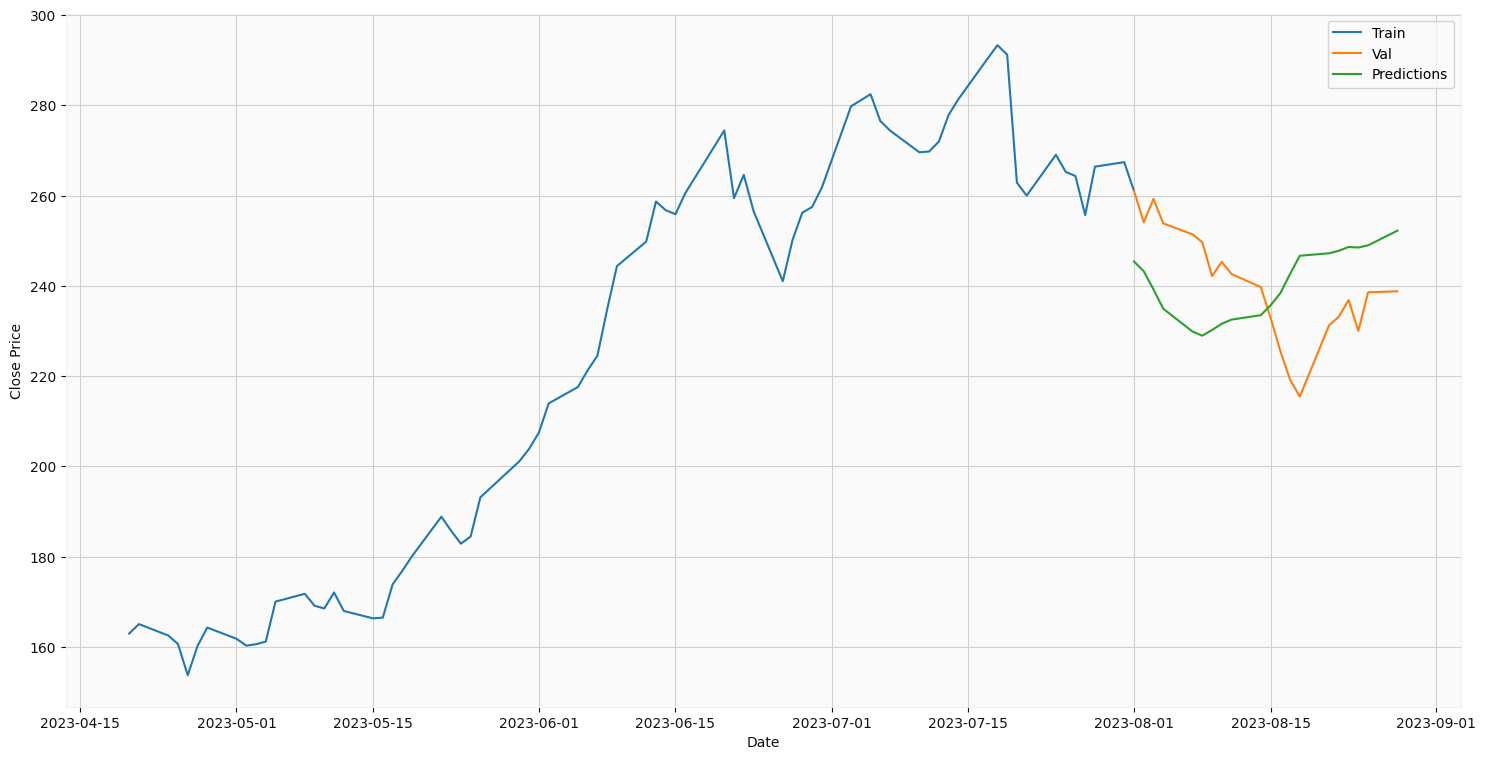

In [98]:
plt.figure(figsize=(18,9))
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.plot(train['close'])
plt.plot(valid['close'])
plt.plot(valid['Predictions'])
#plt.plot(mav.index, mav['price'])
plt.legend(['Train', 'Val','Predictions'])
plt.show()

In [96]:
df1.tail(30)

,open,high,low,close,volume
Date,,,,,
2023-08-01,266.2600,266.4700,260.2500,261.07,83645720
2023-08-02,255.5700,259.5200,250.4900,254.11,101752865
2023-08-03,252.0400,260.4900,252.0000,259.32,97829545
2023-08-04,260.9700,264.7700,253.1100,253.86,99539907
2023-08-07,251.4500,253.6511,242.7600,251.45,111097943
2023-08-08,247.4500,250.9200,245.0100,249.70,96642183
2023-08-09,250.8700,251.1000,241.9000,242.19,101596324
2023-08-10,245.4000,251.8000,243.0000,245.34,109498608
2023-08-11,241.7700,243.7900,238.0200,242.65,99038642


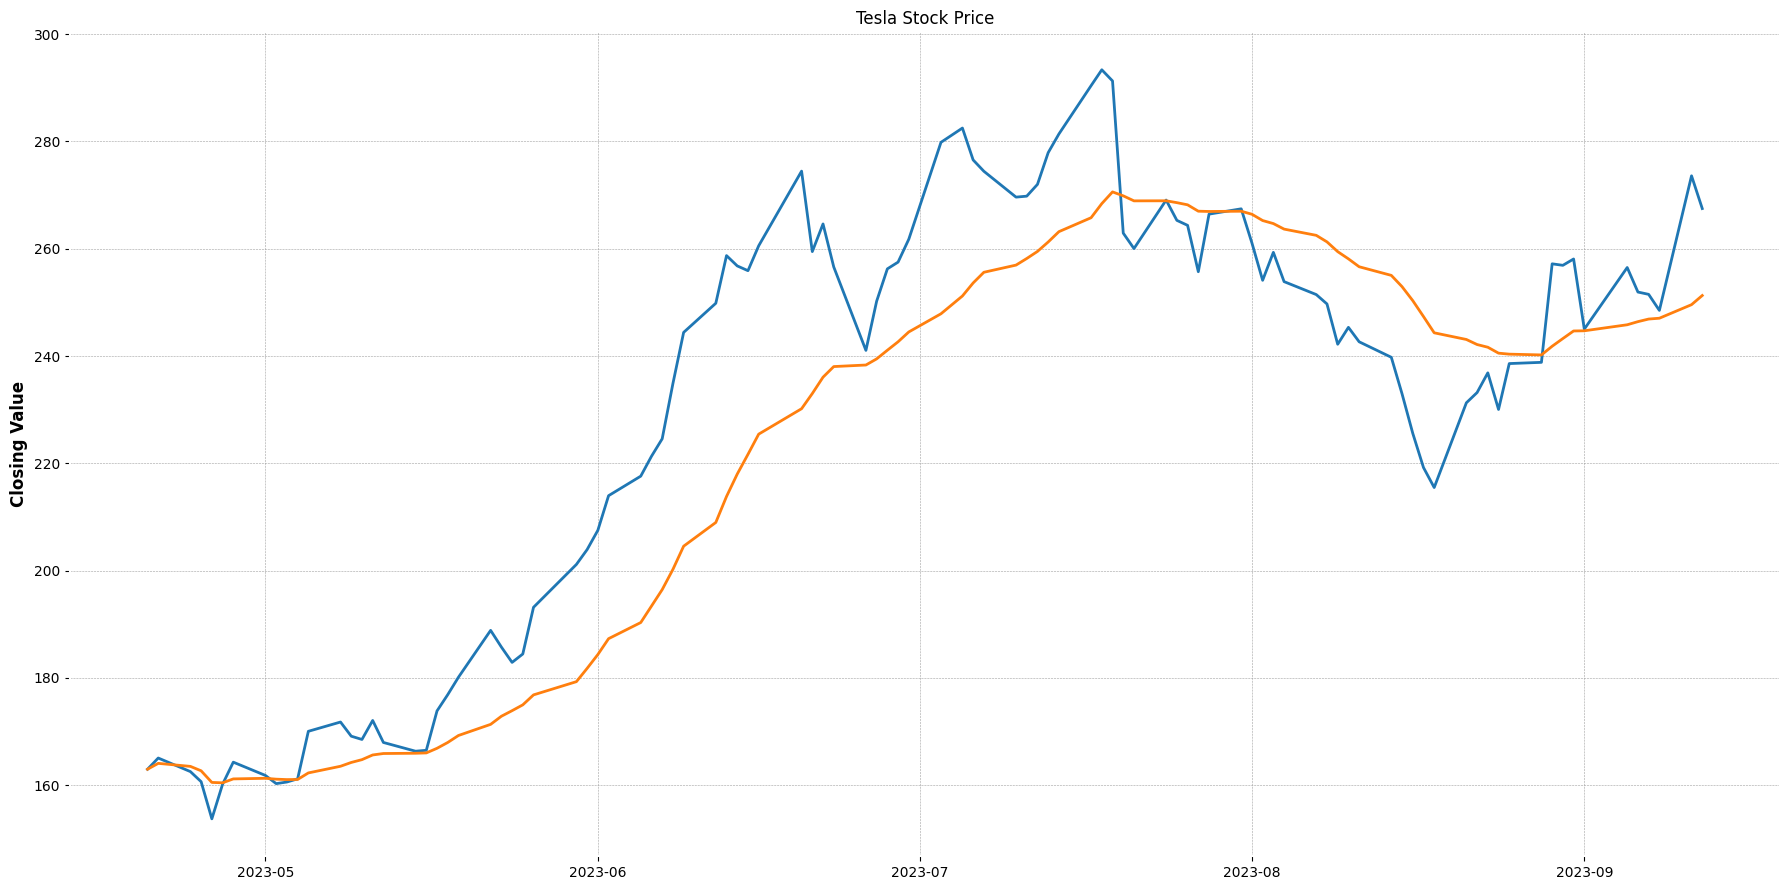

In [97]:
plt.figure(figsize=(18,9))
plt.plot(df['Date'], df['close'])
plt.plot(mav.index, mav['price'])
plt.xlabel('')
plt.ylabel('Closing Value')
plt.title("Tesla Stock Price")
plt.tight_layout()
plt.show()